# **How can we analyze what makes a talk popular using word clouds?** #

# Making a mass set with both the transcripts and data #

In [39]:
#load transcripts in as pandas dataframe
import pandas as pd
transcripts = pd.read_csv("data/transcripts.csv")
ted_data= pd.read_csv("data/ted_main.csv")
ted= pd.merge(transcripts, ted_data, on='url')
ted.to_csv('ted_33.csv', sep='\t', encoding='utf-8')

**How to navigate Pandas in Python**

1. df2.loc[startrow:endrow, startcolumn:endcolumn]
2. A full column df2.loc[:, "transcript" ]
3. A full row df2[1:3]
4. A single cell df2.loc["California","2013"]
5. Merging two datasets on the same column pd.merge(dfinal, df1, on='movie_title')
6. Filter by column if column is greater than some value df.loc[df['column_name'] == some_value]
7. Sort by sort_values(by = ["comments"], ascending=False)
8. Naming columns in dataframe sim_score.columns = ['Similarity Score']


# Word Clouds for all transcripts and titles #

In [40]:
# Transcripts : splitting by words, lowercase, and no punctuation 
import re
transcripts= ted.loc[:, "transcript"]
all_trans = []
for transcript in transcripts:
    transcript=transcript.lower()
    transcript=re.sub("[^A-Za-z0-9]+"," ",transcript)
    transcript=re.sub("[^\w ]","",transcript)
    transcript=transcript.split(",")
    all_trans.extend(transcript)


In [41]:
# Titles : splitting by words, lowercase, and no punctuation  
import re
titles= ted.loc[:, "title"]
all_title = []
for title in titles:
    title=title.lower()
    title=re.sub("[^A-Za-z0-9]+"," ",title)
    title=re.sub("[^\w ]","",title)
    title=title.split(",")
    all_title.extend(title)
all_title
len(all_title)

2467

In [42]:
import os
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import nltk
stops=nltk.corpus.stopwords.words("english")

#Transcripts without stop words
all_transcripts= [word for word in all_trans if word not in stops]
all_transcripts=str(all_transcripts)

#Titles without stop words
all_titles= [t for t in all_title if t not in stops]
all_titles=str(all_titles)

Word Cloud of All Transcripts


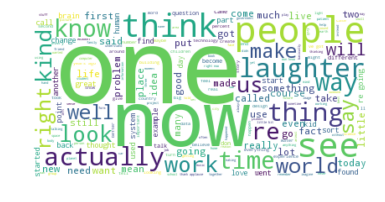

Word Cloud of All Titles


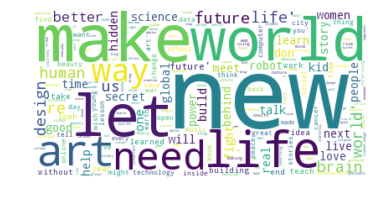

In [43]:
trans_wordcloud = WordCloud(background_color='white'
                         ).generate(all_transcripts)
plt.figure()
plt.imshow(trans_wordcloud, interpolation="bilinear")
plt.axis("off")
print('Word Cloud of All Transcripts')
plt.show()


title_wordcloud = WordCloud(background_color='white'
                         ).generate(all_titles)
plt.figure()
plt.imshow(title_wordcloud, interpolation="bilinear")
plt.axis("off")
print('Word Cloud of All Titles')
plt.show()

# Examining titles of top 10 percent of viewed talks #

In [44]:
top10_views = ted["views"].quantile(.9)
#top10_views

In [45]:
top_10 = ted.loc[ted['views'] > top10_views]

transcripts10= top_10.loc[:, "transcript"]
all_trans = []
for transcript in transcripts10:
    transcript=transcript.lower()
    transcript=re.sub("[^A-Za-z0-9]+"," ",transcript)
    transcript=re.sub("[^\w ]","",transcript)
    transcript=transcript.split(",")
    all_trans.extend(transcript)

titles10= top_10.loc[:, "title"]
all_title10 = []
for title in titles10:
    title=title.lower()
    title=re.sub("[^A-Za-z0-9]+"," ",title)
    title=re.sub("[^\w ]","",title)
    title=title.split(",")
    all_title10.extend(title)
    
all_transcripts10= [word for word in all_trans if word not in stops]
all_transcripts10=str(all_transcripts)
    
all_titles10= [t for t in all_title10 if t not in stops]
all_titles10=str(all_titles)

Word Cloud of Transcripts from Top 10


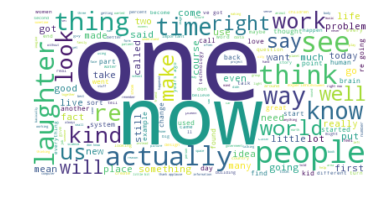

Word Cloud of Top 10th Quantile (by views) Titles


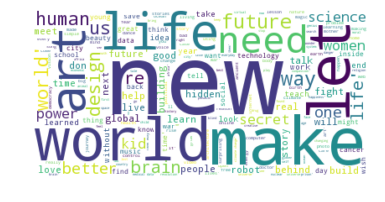

In [46]:
trans_wordcloud10 = WordCloud(background_color='white'
                         ).generate(all_transcripts10)
plt.figure()
plt.imshow(trans_wordcloud10, interpolation="bilinear")
plt.axis("off")
print('Word Cloud of Transcripts from Top 10')
plt.show()



title_wordcloud10 = WordCloud(background_color='white'
                         ).generate(all_titles10)
plt.figure()
plt.imshow(title_wordcloud10, interpolation="bilinear")
plt.axis("off")
print('Word Cloud of Top 10th Quantile (by views) Titles')
plt.show()

## Analyzing Views vs Comments and Duration vs Views

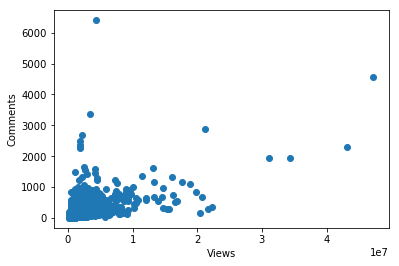

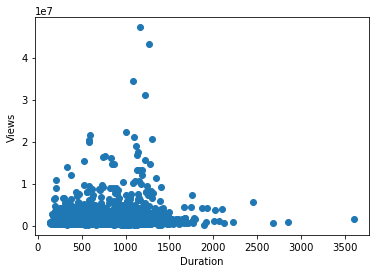

In [47]:
# make a scatter plot with comments and views on the x and y 

plt.scatter(ted.loc[:,"views"],ted.loc[:,"comments"])
plt.xlabel("Views")
plt.ylabel("Comments")
plt.show()

#Scatterplot of duration and views

plt.scatter(ted.loc[:,"duration"],ted.loc[:,"views"])
plt.xlabel("Duration")
plt.ylabel("Views")
plt.show()

In [48]:
#Let's see what the titles of the videos with the most comments
#What gets people talking?
sort_comments = ted.sort_values(by = ["comments"], ascending= False)
sort_comments.head(3).loc[:,["title","views", "comments"]].sort_values(by = ["comments"], ascending=False)
#ted.loc[ted.comments == 6404].loc[:,"title"]

,title,views,comments
95,Militant atheism,4374792,6404
0,Do schools kill creativity?,47227110,4553
619,Science can answer moral questions,3433437,3356


seems like combination of good and bad...sentiment analysis? INTERESTING POINT
schools and kill
science morality
militant atheism. Do the transcripts work the same way?

Make a function that takes in a Category of talks (taken from the word cloud and then give a reccomendation based on the talks with the most number of times that that word appears)


# Tags (Ultimate goal of having you put in tags that you like and then we will reccommend talks and give you info about them) #

Choose a tag that interests you. You also have the option to choose more than one tag if a specific combination interests you. We will return to you TED talks that pertain to the topic that you chose. Our methodology involves finding the talks which contain the tags or combination of tags that you chose. The list of recommneded TED talks for you will be sorted by popularity, and we will provide statistics (desription, popularity) about each talk for you as well. In addition, we are working on a feature that will let us create an even stronger prediction by searching within the texts of the talks to find which talks use your tags the most.

Word Cloud of All Tags


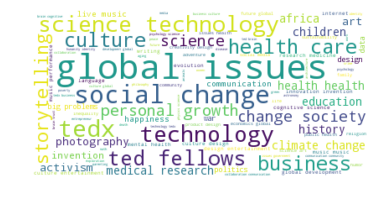

In [49]:
tags= ted.loc[:, "tags"]

#Clean tags for word cloud
all_tags = []
for tag in tags:
    tag=tag.lower()
    tag=re.sub("[^A-Za-z0-9]+"," ",tag)
    tag=re.sub("[^\w ]","",tag)
    tag=tag.split(",")
    all_tags.extend(tag)
    
    
all_tags=str(all_tags)

#Create word cloud
tags_wordcloud = WordCloud(background_color='white'
                         ).generate(all_tags)
plt.figure()
plt.imshow(tags_wordcloud, interpolation="bilinear")
plt.axis("off")
print('Word Cloud of All Tags')
plt.show()

In [50]:
#make a counter for the number of times that the tag is said i
def recommend_talk(tag1,tag2,tag3):
    pd.set_option('display.max_colwidth', -1)
    if tag2 == "" and tag3 == "":
        recs1= ted[ted['tags'].str.contains(tag1)].sort_values(by = ["views"], ascending=False)
        recs1= recs1.set_index('title')
        return recs1.loc[:,['description','tags','views']]
    if tag3 == "":    
        recs2= ted[ted['tags'].str.contains(tag1) & ted['tags'].str.contains(tag2)].sort_values(by = ["views"], ascending=False)
        recs2= recs2.set_index('title')
        return recs2.loc[:,['description','tags','views']]
    else:
        recs3= ted[ted['tags'].str.contains(tag1) & ted['tags'].str.contains(tag2) & ted['tags'].str.contains(tag3)].sort_values(by = ["views"], ascending=False)
        recs3= recs3.set_index('title')
        return recs3.loc[:,['title','description','tags','views']]
    


recommend_talk('technology','music', '')

,description,tags,views
title,,,
The magic of truth and lies (and iPods),"Using three iPods like magical props, Marco Tempest spins a clever, surprisingly heartfelt meditation on truth and lies, art and emotion.","['art', 'design', 'entertainment', 'illusion', 'magic', 'music', 'technology']",5447236
"Thoughts on humanity, fame and love","""I sell dreams, and I peddle love to millions of people,"" says Shah Rukh Khan, Bollywood's biggest star. In this charming, funny talk, Khan traces the arc of his life, showcases a few of his famous dance moves and shares hard-earned wisdom from a life spent in the spotlight.","['aging', 'art', 'communication', 'dance', 'entertainment', 'family', 'future', 'happiness', 'humanity', 'india', 'love', 'movies', 'music', 'personal growth', 'success', 'technology']",4642478
"Robots with ""soul""","What kind of robots does an animator / jazz musician / roboticist make? Playful, reactive, curious ones. Guy Hoffman shows demo film of his family of unusual robots -- including two musical bots that like to jam with humans.","['AI', 'TEDx', 'entertainment', 'jazz', 'music', 'robots', 'technology']",2931366
I listen to color,"Artist Neil Harbisson was born completely color blind, but these days a device attached to his head turns color into audible frequencies. Instead of seeing a world in grayscale, Harbisson can hear a symphony of color -- and yes, even listen to faces and paintings.","['Senses', 'art', 'cyborg', 'design', 'entertainment', 'innovation', 'music', 'prosthetics', 'sound', 'technology']",2468887
The polyphonic me,"Frustrated by not being able to sing two notes at the same time, musical inventor Beardyman built a machine to allow him to create loops and layers from just the sounds he makes with his voice. Given that he can effortlessly conjure the sound of everything from crying babies to buzzing flies, not to mention mimic pretty much any musical instrument imaginable, that's a lot of different sounds. Sit back and let the wall of sound of this dazzling performance wash over you.","['creativity', 'entertainment', 'music', 'technology']",2067955
My web playroom,"On the web, a new ""Friend"" may be just a click away, but true connection is harder to find and express. Ze Frank presents a medley of zany Internet toys that require deep participation -- and reward it with something more nourishing. You're invited, if you promise you'll share.","['Internet', 'comedy', 'gaming', 'humanity', 'humor', 'music', 'play', 'technology', 'web']",1876053
Toy tiles that talk to each other,"MIT grad student David Merrill demos Siftables -- cookie-sized, computerized tiles you can stack and shuffle in your hands. These future-toys can do math, play music, and talk to their friends, too. Is this the next thing in hands-on learning?","['art', 'business', 'children', 'computers', 'design', 'education', 'invention', 'music', 'technology', 'toy']",1765153
The untouchable music of the theremin,"Virtuoso Pamelia Kurstin performs and discusses her theremin, the not-just-for-sci-fi electronic instrument that is played without being touched. Songs include ""Autumn Leaves,"" ""Lush Life"" and David Mash’s ""Listen, Words Are Gone.""","['live music', 'music', 'performance', 'technology']",1687185
Simplicity sells,"New York Times columnist David Pogue takes aim at technology’s worst interface-design offenders, and provides encouraging examples of products that get it right. To funny things up, he bursts into song.","['computers', 'entertainment', 'interface design', 'media', 'music', 'performance', 'simplicity', 'software', 'technology']",1636292


In [13]:
trans4train = []
for transcript in transcripts:
    transcript=re.sub(":","",transcript)
    transcript=re.sub("\?","",transcript)
    transcripte=re.sub("\-","",transcript)
    transcript=re.sub("\"","",transcript)
    transcript=re.sub("(Laughter)","",transcript)
    transcript=re.sub("\(\)"," ",transcript)
    transcript=transcript.split(",")
    trans4train.append(transcript)


In [14]:
tits= ted.loc[:, "title"]
sentence=[]
for title in tits:
    print(type(title))
    title=re.sub(":","",title)
    title=re.sub("\?","",title)
    title=re.sub("\-","",title)
    title=title.split()
    sentence.append(title)
sentence



#max(len(l) for l in sentence)

#for sent in sentence:
    #if len(sent) == 12:
       # print(sent)
    

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

[['Do', 'schools', 'kill', 'creativity'],
 ['Averting', 'the', 'climate', 'crisis'],
 ['Simplicity', 'sells'],
 ['Greening', 'the', 'ghetto'],
 ['The', 'best', 'stats', "you've", 'ever', 'seen'],
 ['Why', 'we', 'do', 'what', 'we', 'do'],
 ['Letting', 'go', 'of', 'God'],
 ['Behind', 'the', 'design', 'of', "Seattle's", 'library'],
 ["Let's", 'teach', 'religion', 'all', 'religion', 'in', 'schools'],
 ['A', 'life', 'of', 'purpose'],
 ['My', 'wish', 'A', 'call', 'for', 'opensource', 'architecture'],
 ['My', 'wish', 'A', 'global', 'day', 'of', 'film'],
 ['My', 'wish', 'Help', 'me', 'stop', 'pandemics'],
 ['The', 'radical', 'promise', 'of', 'the', 'multitouch', 'interface'],
 ['One', 'Laptop', 'per', 'Child'],
 ['An', "11yearold's", 'magical', 'violin'],
 ['Improvising', 'on', 'piano,', 'aged', '14'],
 ['Simple', 'designs', 'to', 'save', 'a', 'life'],
 ['Organic', 'design,', 'inspired', 'by', 'nature'],
 ['The', 'birth', 'of', 'Wikipedia'],
 ['The', 'birth', 'of', 'the', 'opensource', 'learni

In [ ]:
#train on something else and rename the model and then use on my data
import gensim
from gensim.models import word2vec
import os
import logging
from gensim.models import KeyedVectors
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
model = gensim.models.Word2Vec(sentence, min_count=1, hs=1)
grand_list=[]

In [38]:
model.wv.similarity('music','')

0.9934346677208797

In [22]:
for item in sentence:
    if len(item)== 1:
        print(item)
        grand_list.append(1)
    if len(item) == 2:
        print((model.similarity(item[0],item[1])),item)
        grand_list.append((model.similarity(item[0],item[1])))
    elif len(item) ==3:
        print((model.similarity(item[0],item[1]) + model.similarity(item[1],item[2]))/2,item)
        grand_list.append((model.similarity(item[0],item[1]) + model.similarity(item[1],item[2]))/2)
    elif len(item) ==4:
        print((model.similarity(item[0],item[1]) + model.similarity(item[1],item[2]) + model.similarity(item[2],item[3]))/3,item)
        grand_list.append((model.similarity(item[0],item[1]) + model.similarity(item[1],item[2]) + model.similarity(item[2],item[3]))/3)
    elif len(item) ==5:
        #print((model.similarity(item[0],item[1]) + model.similarity(item[1],item[2]) + model.similarity(item[2],item[3]) + model.similarity(item[3],item[4]))/4,item)
        grand_list.append((model.similarity(item[0],item[1]) + model.similarity(item[1],item[2]) + model.similarity(item[2],item[3]) + model.similarity(item[3],item[4]))/4)
    elif len(item) ==6:
        #print((model.similarity(item[0],item[1]) + model.similarity(item[1],item[2]) + model.similarity(item[2],item[3]) + model.similarity(item[3],item[4]) + model.similarity(item[4],item[5]))/5,item)
        grand_list.append((model.similarity(item[0],item[1]) + model.similarity(item[1],item[2]) + model.similarity(item[2],item[3]) + model.similarity(item[3],item[4]) + model.similarity(item[4],item[5]))/5)
    elif len(item) ==7:
        #print((model.similarity(item[0],item[1]) + model.similarity(item[1],item[2]) + model.similarity(item[2],item[3]) + model.similarity(item[3],item[4]) + model.similarity(item[4],item[5])+ model.similarity(item[5],item[6]))/6,item)
        grand_list.append((model.similarity(item[0],item[1]) + model.similarity(item[1],item[2]) + model.similarity(item[2],item[3]) + model.similarity(item[3],item[4]) + model.similarity(item[4],item[5])+ model.similarity(item[5],item[6]))/6)
    elif len(item) ==8:
        #print((model.similarity(item[0],item[1]) + model.similarity(item[1],item[2]) + model.similarity(item[2],item[3]) + model.similarity(item[3],item[4]) + model.similarity(item[4],item[5])+ model.similarity(item[5],item[6]) + model.similarity(item[6],item[7]))/7,item)
        grand_list.append((model.similarity(item[0],item[1]) + model.similarity(item[1],item[2]) + model.similarity(item[2],item[3]) + model.similarity(item[3],item[4]) + model.similarity(item[4],item[5])+ model.similarity(item[5],item[6]) + model.similarity(item[6],item[7]))/7)
    elif len(item) ==9:
        #print((model.similarity(item[0],item[1]) + model.similarity(item[1],item[2]) + model.similarity(item[2],item[3]) + model.similarity(item[3],item[4]) + model.similarity(item[4],item[5])+ model.similarity(item[5],item[6]) + model.similarity(item[6],item[7]) + model.similarity(item[7],item[8]))/8,item)
        grand_list.append((model.similarity(item[0],item[1]) + model.similarity(item[1],item[2]) + model.similarity(item[2],item[3]) + model.similarity(item[3],item[4]) + model.similarity(item[4],item[5])+ model.similarity(item[5],item[6]) + model.similarity(item[6],item[7]) + model.similarity(item[7],item[8]))/8)
    elif len(item) ==10:
        #print((model.similarity(item[0],item[1]) + model.similarity(item[1],item[2]) + model.similarity(item[2],item[3]) + model.similarity(item[3],item[4]) + model.similarity(item[4],item[5])+ model.similarity(item[5],item[6]) + model.similarity(item[6],item[7]) + model.similarity(item[7],item[8]) + model.similarity(item[8],item[9]))/9,item)
        grand_list.append((model.similarity(item[0],item[1]) + model.similarity(item[1],item[2]) + model.similarity(item[2],item[3]) + model.similarity(item[3],item[4]) + model.similarity(item[4],item[5])+ model.similarity(item[5],item[6]) + model.similarity(item[6],item[7]) + model.similarity(item[7],item[8]) + model.similarity(item[8],item[9]))/9)
    elif len(item) ==11:
        #print((model.similarity(item[0],item[1]) + model.similarity(item[1],item[2]) + model.similarity(item[2],item[3]) + model.similarity(item[3],item[4]) + model.similarity(item[4],item[5])+ model.similarity(item[5],item[6]) + model.similarity(item[6],item[7]) + model.similarity(item[7],item[8]) + model.similarity(item[8],item[9]) + model.similarity(item[9],item[10]))/10,item)
        grand_list.append((model.similarity(item[0],item[1]) + model.similarity(item[1],item[2]) + model.similarity(item[2],item[3]) + model.similarity(item[3],item[4]) + model.similarity(item[4],item[5])+ model.similarity(item[5],item[6]) + model.similarity(item[6],item[7]) + model.similarity(item[7],item[8]) + model.similarity(item[8],item[9]) + model.similarity(item[9],item[10]))/10)
    elif len(item) ==12:
        #print((model.similarity(item[0],item[1]) + model.similarity(item[1],item[2]) + model.similarity(item[2],item[3]) + model.similarity(item[3],item[4]) + model.similarity(item[4],item[5])+ model.similarity(item[5],item[6]) + model.similarity(item[6],item[7]) + model.similarity(item[7],item[8]) + model.similarity(item[8],item[9]) +  model.similarity(item[9],item[10]) +model.similarity(item[10],item[11]))/11,item)
        grand_list.append((model.similarity(item[0],item[1]) + model.similarity(item[1],item[2]) + model.similarity(item[2],item[3]) + model.similarity(item[3],item[4]) + model.similarity(item[4],item[5])+ model.similarity(item[5],item[6]) + model.similarity(item[6],item[7]) + model.similarity(item[7],item[8]) + model.similarity(item[8],item[9]) +  model.similarity(item[9],item[10]) +model.similarity(item[10],item[11]))/11)
    elif len(item) ==13:
        #print((model.similarity(item[0],item[1]) + model.similarity(item[1],item[2]) + model.similarity(item[2],item[3]) + model.similarity(item[3],item[4]) + model.similarity(item[4],item[5])+ model.similarity(item[5],item[6]) + model.similarity(item[6],item[7]) + model.similarity(item[7],item[8]) + model.similarity(item[8],item[9]) +  model.similarity(item[9],item[10]) + model.similarity(item[10],item[11]) + model.similarity(item[11],item[12]))/12,item)
        grand_list.append((model.similarity(item[0],item[1]) + model.similarity(item[1],item[2]) + model.similarity(item[2],item[3]) + model.similarity(item[3],item[4]) + model.similarity(item[4],item[5])+ model.similarity(item[5],item[6]) + model.similarity(item[6],item[7]) + model.similarity(item[7],item[8]) + model.similarity(item[8],item[9]) +  model.similarity(item[9],item[10]) + model.similarity(item[10],item[11]) + model.similarity(item[11],item[12]))/12)
    elif len(item) ==14:
        #print((model.similarity(item[0],item[1]) + model.similarity(item[1],item[2]) + model.similarity(item[2],item[3]) + model.similarity(item[3],item[4]) + model.similarity(item[4],item[5])+ model.similarity(item[5],item[6]) + model.similarity(item[6],item[7]) + model.similarity(item[7],item[8]) + model.similarity(item[8],item[9]) +  model.similarity(item[9],item[10]) + model.similarity(item[10],item[11]) + model.similarity(item[11],item[12]) + model.similarity(item[12],item[13]))/13,item)
        grand_list.append((model.similarity(item[0],item[1]) + model.similarity(item[1],item[2]) + model.similarity(item[2],item[3]) + model.similarity(item[3],item[4]) + model.similarity(item[4],item[5])+ model.similarity(item[5],item[6]) + model.similarity(item[6],item[7]) + model.similarity(item[7],item[8]) + model.similarity(item[8],item[9]) +  model.similarity(item[9],item[10]) + model.similarity(item[10],item[11]) + model.similarity(item[11],item[12]) + model.similarity(item[12],item[13]))/13)
    elif len(item) ==15:
        #print((model.similarity(item[0],item[1]) + model.similarity(item[1],item[2]) + model.similarity(item[2],item[3]) + model.similarity(item[3],item[4]) + model.similarity(item[4],item[5])+ model.similarity(item[5],item[6]) + model.similarity(item[6],item[7]) + model.similarity(item[7],item[8]) + model.similarity(item[8],item[9]) +  model.similarity(item[9],item[10]) + model.similarity(item[10],item[11]) + model.similarity(item[11],item[12]) + model.similarity(item[12],item[13]) + model.similarity(item[13],item[14]))/14,item)
        grand_list.append((model.similarity(item[0],item[1]) + model.similarity(item[1],item[2]) + model.similarity(item[2],item[3]) + model.similarity(item[3],item[4]) + model.similarity(item[4],item[5])+ model.similarity(item[5],item[6]) + model.similarity(item[6],item[7]) + model.similarity(item[7],item[8]) + model.similarity(item[8],item[9]) +  model.similarity(item[9],item[10]) + model.similarity(item[10],item[11]) + model.similarity(item[11],item[12]) + model.similarity(item[12],item[13]) + model.similarity(item[13],item[14]))/14)       
#keep going until you get all of the titles and then find out about the commments for each one

2018-05-02 13:07:30,509 : INFO : collecting all words and their counts
2018-05-02 13:07:30,510 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-05-02 13:07:30,515 : INFO : collected 4493 word types from a corpus of 15383 raw words and 2467 sentences
2018-05-02 13:07:30,517 : INFO : Loading a fresh vocabulary
2018-05-02 13:07:30,528 : INFO : min_count=1 retains 4493 unique words (100% of original 4493, drops 0)
2018-05-02 13:07:30,529 : INFO : min_count=1 leaves 15383 word corpus (100% of original 15383, drops 0)
2018-05-02 13:07:30,544 : INFO : deleting the raw counts dictionary of 4493 items
2018-05-02 13:07:30,545 : INFO : sample=0.001 downsamples 34 most-common words
2018-05-02 13:07:30,547 : INFO : downsampling leaves estimated 12236 word corpus (79.5% of prior 15383)
2018-05-02 13:07:30,554 : INFO : constructing a huffman tree from 4493 words
2018-05-02 13:07:30,821 : INFO : built huffman tree with maximum node depth 14
2018-05-02 13:07:30,830 : INFO

Word2Vec(vocab=4493, size=100, alpha=0.025)
0.9108608756197801 ['Do', 'schools', 'kill', 'creativity']
0.8726672740238158 ['Averting', 'the', 'climate', 'crisis']
0.41944476657259055 ['Simplicity', 'sells']
0.5912964587136145 ['Greening', 'the', 'ghetto']
0.9002686746978185 ['Letting', 'go', 'of', 'God']
0.3826231139180327 ['A', 'life', 'of', 'purpose']
0.784830562468497 ['One', 'Laptop', 'per', 'Child']
0.38091257892633995 ['An', "11yearold's", 'magical', 'violin']
0.7540443760106011 ['The', 'birth', 'of', 'Wikipedia']
0.662238555178027 ['Nerdcore', 'comedy']
0.5795826517487483 ['The', 'paradox', 'of', 'choice']
0.7770577389994742 ['How', 'technology', 'evolves']
0.9560708063629813 ['8', 'secrets', 'of', 'success']
0.14438007035603231 ['Dreams', 'from', 'endangered', 'cultures']
0.20897672724163277 ['Photos', 'of', 'endangered', 'cultures']
0.038046358742291675 ['Four', 'American', 'characters']
0.26814809906928616 ['Everyday', 'inventions']
0.7795712210950816 ['In', 'praise', 'of', '

0.9284303610227705 ['Smash', 'fear,', 'learn', 'anything']
0.7346190496052817 ['Reporting', 'crisis', 'via', 'texting']
0.6809377349811712 ['How', 'ideas', 'trump', 'crises']
0.8656261377347706 ['A', 'onewoman', 'global', 'village']
0.015933607302648145 ['The', 'mathematics', 'of', 'war']
0.7975974318977624 ['Antigravity', 'sculpture']
0.2746895143359899 ['The', 'tribes', 'we', 'lead']
0.8712809160618185 ['Ideas', 'for', "India's", 'future']
0.2309436971945819 ['A', 'fullband', 'beatbox']
0.36098836812742957 ['A', 'supercharged', 'motorcycle', 'design']
0.7132504894690436 ["Don't", 'eat', 'the', 'marshmallow!']
0.9331296813874594 ['The', "world's", 'English', 'mania']
0.4552056928126953 ['The', 'world', 'in', '2200']
0.46607151385830525 ['Ecofriendly', 'drywall']
-0.16275458130226475 ['Happiness', 'and', 'its', 'surprises']
0.580050153446601 ['Life', 'in', 'Biosphere', '2']
-0.3052920862617156 ['The', 'psychology', 'of', 'time']
0.9324239517953314 ['Teach', 'statistics', 'before', 'cal

/Users/morganhogenmiller/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:42: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
/Users/morganhogenmiller/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:45: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
/Users/morganhogenmiller/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:48: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
/Users/morganhogenmiller/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:51: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
/Users/morganhogenmiller/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:57: DeprecationWarning: Call to deprecated `similarity` (Method will be removed 

0.9300674654501813 ['The', 'toxic', 'baby']
0.5570264733673782 ['Crowdsource', 'your', 'health']
0.6122812258785595 ['Comedy', 'is', 'translation']
0.6271915425586941 ['Saving', 'for', 'tomorrow,', 'tomorrow']
-0.39828399297565664 ['My', 'immigration', 'story']
0.8285458736137178 ['Why', 'videos', 'go', 'viral']
0.9464947932772162 ['The', "ocean's", 'shifting', 'baseline']
0.38164082592840626 ['Abundance', 'is', 'our', 'future']
0.46078143149434253 ['The', 'Earth', 'is', 'full']
0.3531352728722689 ['The', 'power', 'of', 'introverts']
0.5133174000141291 ['Coding', 'a', 'better', 'government']
0.8675301657262476 ['The', '$8', 'billion', 'iPod']
0.8675301657262476 ['The', '$8', 'billion', 'iPod']
0.43469513625771855 ['Listening', 'to', 'shame']
0.43469513625771855 ['Listening', 'to', 'shame']
0.5509969472277101 ["Let's", 'talk', 'about', 'dying']
0.626648998258088 ['I', 'am', 'a', 'pirate']
0.006300913138623576 ['Connected,', 'but', 'alone']
0.3692178804617083 ['The', 'other', 'inconvenie

/Users/morganhogenmiller/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:54: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).


In [23]:
#Making sure that the length of the average similarity scores is the same as the length of titles
import numpy as np
print(len(grand_list))
#type(grand_list)

2467


In [24]:
#Creates pandas dataframs with one column for each title's similarity score
sim_score =  pd.DataFrame(grand_list)
sim_score.columns = ['Similarity Score']

In [25]:
#Concatinates the two dataframes and pulls only relevant information for answering our question
result1 = pd.concat([ted, sim_score], axis=1, join='inner')
sim_focused=result1.loc[:, ["title","Similarity Score","comments","views"]]
#sim_focused.sort_values(by = ["views"])

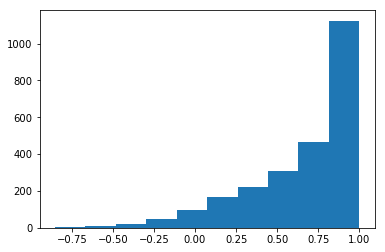

In [26]:
#Makes a histogram to show the distribution of similarity scores
import numpy as np
import decimal
import matplotlib.pyplot as plt
plt.hist(sim_focused.loc[:,'Similarity Score'])
plt.show()

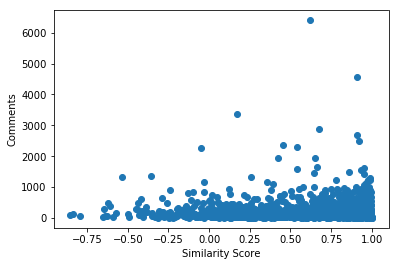

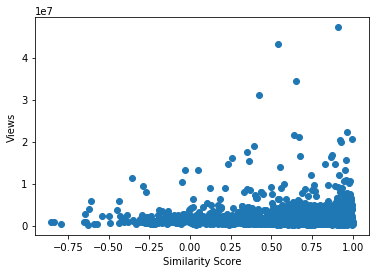

In [27]:
##Scatterplot of similarity scores vs comments
plt.scatter(sim_focused.loc[:,"Similarity Score"],sim_focused.loc[:,"comments"])
plt.xlabel("Similarity Score")
plt.ylabel("Comments")
plt.show()

#Scatterplot of similarity scores vs view
plt.scatter(sim_focused.loc[:,"Similarity Score"],sim_focused.loc[:,"views"])
plt.xlabel("Similarity Score")
plt.ylabel("Views")
plt.show()

In [29]:
w1='music'
model1.most_similar (positive=w1)


/Users/morganhogenmiller/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('on', 0.998652994632721),
 ('and', 0.9985408186912537),
 ('that', 0.9984702467918396),
 ('my', 0.9984151124954224),
 ('New', 0.9983876943588257),
 ('An', 0.9983714818954468),
 ('of', 0.9983611106872559),
 ('...', 0.9982519745826721),
 ('as', 0.99824458360672),
 ('The', 0.9982309937477112)]